In [1]:
categories = ['Frogs', 'Hogs', 'Dogs', 'Logs']
magnitudes = [15, 30, 45, 10]

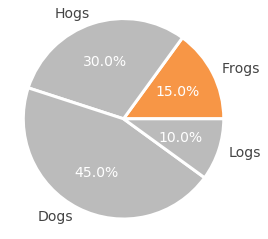

In [43]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [4, 4]

explode = [0,0,0,0]

highlight = ['Frogs']

highlight_color = '#F79646'
background_color = '#bbbbbb'

fig1, ax1 = plt.subplots()
data = ax1.pie(magnitudes, 
        labels=categories, 
        autopct='%1.1f%%', 
        startangle=0)

for label, wedge, outer, inner in zip(categories, *data):
    if label in highlight:
        wedge.set_color(highlight_color)
    else:
        wedge.set_color(background_color)

    wedge.set_edgecolor('white')
    wedge.set_linewidth(3)
    #wedge.fill = False

    inner.set_color('white')
    inner.set_size(14)
    
    outer.set_color('#444444')
    outer.set_size(14)
    
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [3]:
import numpy as np
t = np.array(range(7))

a = t*0 + 5
b = t*3 + 2
c = t**2 + 2

labels = ['a', 'b', 'c']
data = [a, b, c]

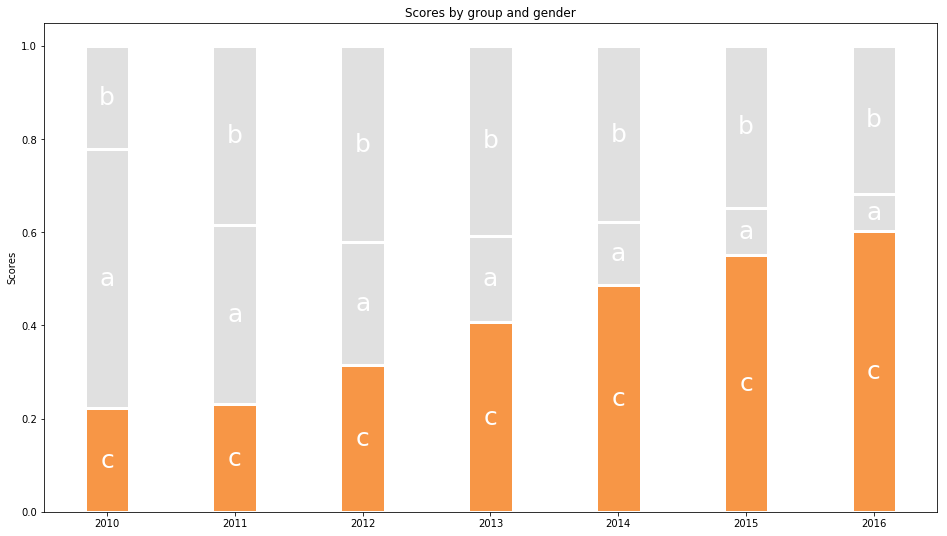

In [4]:
# a stacked bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt

def normalize(data):
    total = data[0]*0
    for d in data:
        total += d
    
    data = [d/total for d in data]
    return data

    
def draw_stuff(labels, data, highlight, move_highlight=True):
    n = len(data[0])

    data = normalize(data)
    data = {k:v for k, v in zip(labels, data)}
    
    if move_highlight:
        labels = [e for e in highlight if e in labels] + [e for e in labels if e not in highlight]
    
    ind = np.arange(n)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    bottom = ind*0.0

    text = []
    
    for label in labels:
        v = data[label]
        
        bar = plt.bar(ind, v, width,
                      bottom=bottom)
        bottom += v*1.0

        for p in bar:
            if label in highlight:
                p.set_color('#F79646')
            else:
                p.set_color('#E0E0E0')
            
            p.set_edgecolor('white')
            p.set_linewidth(3)
            
            center_x = p.get_x() + p.get_width()/2
            center_y = p.get_y() + p.get_height()/2
            text.append((center_x, center_y, label))

    for x, y, t in text:
        plt.text(x, y, s=t, color='white', size=25,
                 horizontalalignment='center',
                 verticalalignment='center')
    
    plt.ylabel('Scores')
    plt.title('Scores by group and gender')
    #plt.yticks(np.arange(0, 81, 10))
    #plt.legend((p1[0], p2[0]), ('Men', 'Women'))

    plt.xticks(ind, ['201{0}'.format(i) for i in ind])

    plt.show()



plt.rcParams["figure.figsize"] = [16,9]

draw_stuff(labels, data, highlight=['c'])



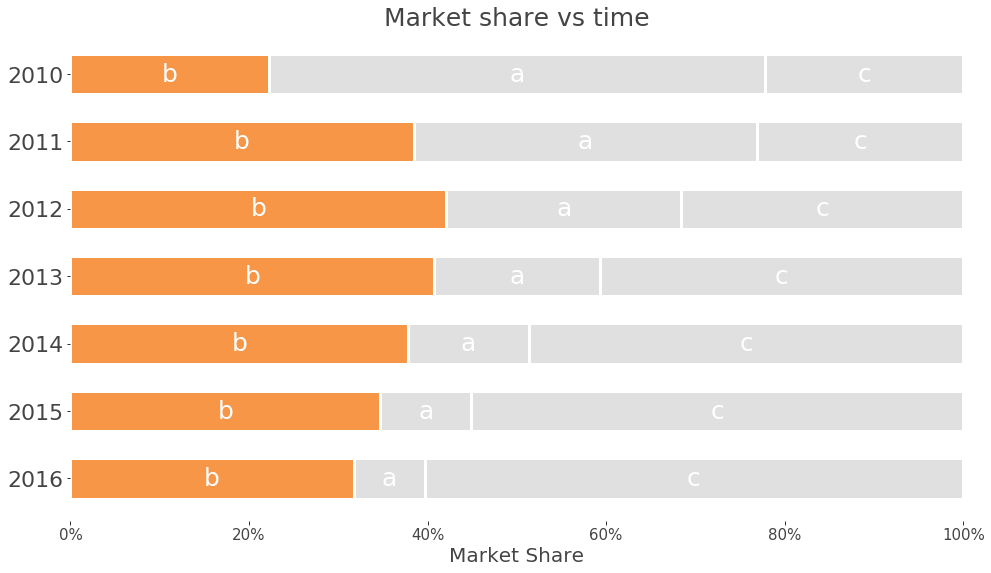

In [41]:
# a stacked bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt

def normalize(data):
    total = data[0]*0
    for d in data:
        total += d
    
    data = [d/total for d in data]
    return data

    
def draw_stuff(labels, data, highlight, move_highlight=True):
    n = len(data[0])

    data = normalize(data)
    data = {k:v for k, v in zip(labels, data)}
    
    if move_highlight:
        labels = [e for e in highlight if e in labels] + [e for e in labels if e not in highlight]
    
    ind = np.arange(n-1, -1, -1)    # the x locations for the groups
    width = 0.6       # the width of the bars: can also be len(x) sequence

    left = ind*0.0

    text = []
    
    for label in labels:
        v = data[label]
        
        bar = plt.barh(ind, v, width,
                      left=left)
        left += v*1.0

        for p in bar:
            if label in highlight:
                p.set_color('#F79646')
            else:
                p.set_color('#E0E0E0')
            
            p.set_edgecolor('white')
            p.set_linewidth(3)
            
            center_x = p.get_x() + p.get_width()/2
            center_y = p.get_y() + p.get_height()/2
            text.append((center_x, center_y, label))

    for x, y, t in text:
        plt.text(x, y, s=t, color='white', size=25,
                 horizontalalignment='center',
                 verticalalignment='center')

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
        
    plt.xlabel('Market Share',
               color='#444444',
               size=20)
    plt.title('Market share vs time',
              color='#444444',
              size=25)
    #plt.yticks(np.arange(0, 81, 10))
    #plt.legend((p1[0], p2[0]), ('Men', 'Women'))

    plt.yticks(ind, ['201{0}'.format(6-i) for i in ind],
               size=22,
               color='#444444')

    i = [0, 0.2, 0.4, 0.6, 0.8, 1]
    plt.xticks(i,
               ['{0:.0f}%'.format(j*100) for j in i],
               size=15,
               color='#444444')
    plt.xlim(xmin=0, xmax=1)

    plt.show()



plt.rcParams["figure.figsize"] = [16,9]

draw_stuff(labels, data, highlight=['b'])



In [51]:
import numpy as np

np.random.seed(42)

n = 10000
x = (np.array(range(n)) + np.random.random((1,n))**2) / n * 10
y = np.random.random((1,n))**2 + np.array(range(n))/n

#import matplotlib.pyplot as plt

#plt.scatter(x, y, s=1)
#plt.show()

x = x.round()

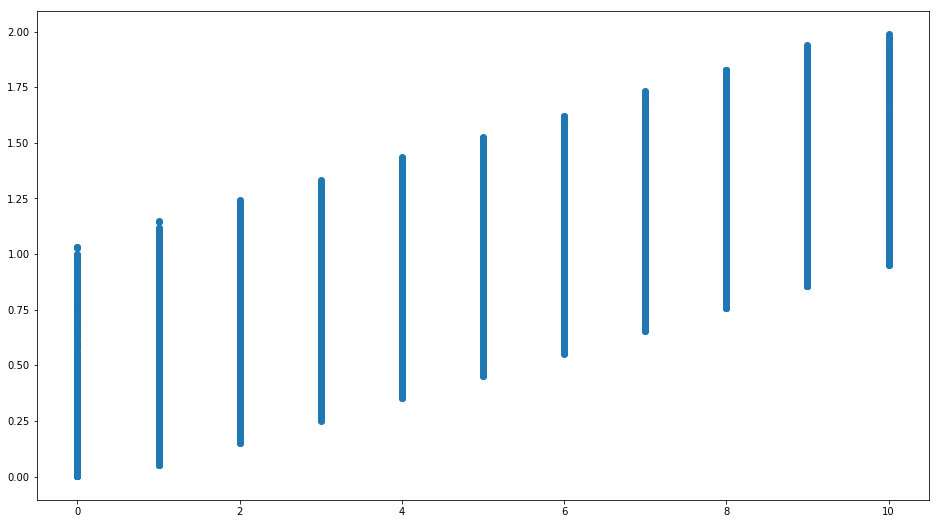

In [52]:
plt.rcParams["figure.figsize"] = [16,9]

plt.scatter(x, y)
plt.show()

In [68]:
def jitter(x, y, x_width=None, y_width=None, s=1, alpha=1.0):
    if x_width:
        x_ = x + np.random.random(x.shape)*x_width - (x_width/2)
    else:
        x_ = x

    if y_width:
        y_ = y + np.random.random(y.shape)*y_width - (y_width/2)
    else:
        y_ = y
    
    plt.scatter(x_, y_, s=s, alpha=alpha)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    plt.yticks([0, 0.5, 1, 1.5, 2],
               size=16,
               color='#444444')
    
    plt.xticks(list(range(10+1)),
               size=18,
               color='#444444')
    
    plt.show()

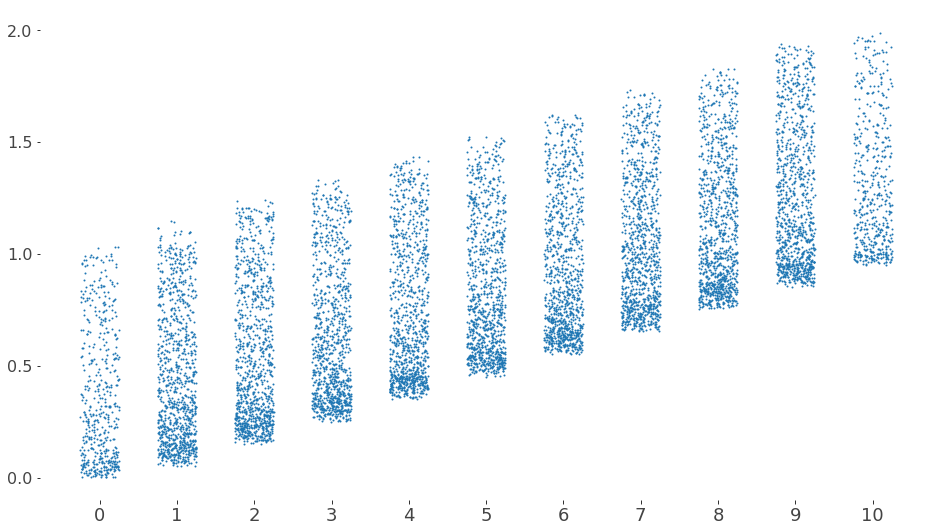

In [69]:

#x_adj += np.random.random(x_adj.shape)*width - (width/2)
plt.rcParams["figure.figsize"] = [16,9]

width = 0.5
jitter(x, y, x_width=width)

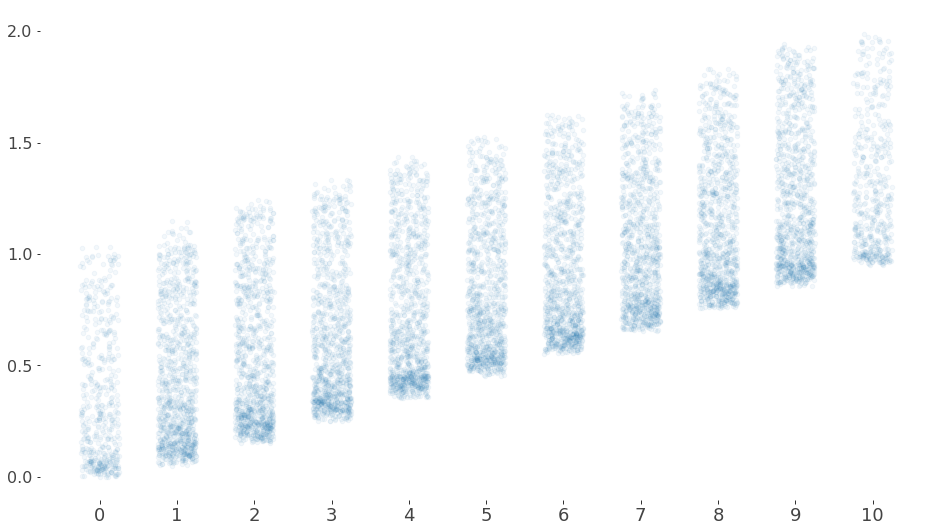

In [70]:
plt.rcParams["figure.figsize"] = [16,9]

width = 0.5
jitter(x, y, x_width=width, s=20, alpha=0.05)

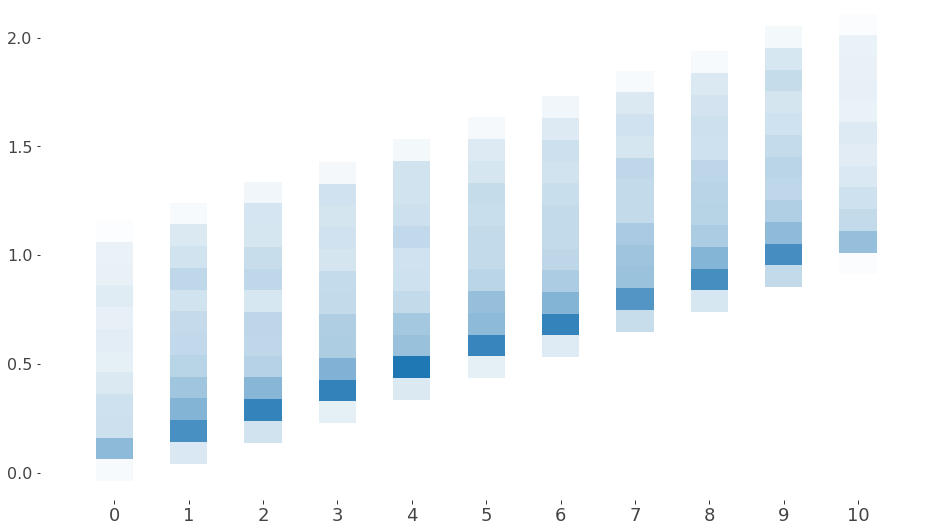

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

def calc_distribution(y, shift=True):
    if shift:
        offset = np.mean(y)
        y -= offset
    else:
        offset = 0
    
    n = 10
    
    d = {}
    y = list((y*n).round())
    for i in y:
        d[i] = d.get(i, 0) + 1

    out = []
    for k, v in d.items():
        out.append((k/n + offset, 1/n, v))

    return out
    
    return [(0, 1, 0.5),
            (1, 1, 0.25)]

def density_plot(x, y):
    width = 0.5
    facecolor = 'r'
    edgecolor = 'None'
    alpha = 0.5
    
    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Create list for all the error patches
    errorboxes = []

    data = {}
    for i in list(set(*x)):
        data[str(i)] = y[x == i]
    
    max_alpha = 0
    rects = []
    for k, v in data.items():
        k = float(k)
        
        results = calc_distribution(v, shift=True)
        
        for y1, height, alpha in results:
            max_alpha = max(max_alpha, alpha)
            rect = ((k - width/2, y1), width, height, alpha)
            rects.append(rect)
    
    for xy, width, height, alpha in rects:
        ax.add_patch(Rectangle(xy, width, height, alpha=alpha/max_alpha))

    # Create patch collection with specified colour/alpha
    #pc = PatchCollection(errorboxes, facecolor=facecolor,
    #                    edgecolor=edgecolor)

    # Add collection to axes
    #ax.add_collection(pc)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    plt.yticks([0, 0.5, 1, 1.5, 2],
               size=16,
               color='#444444')
    
    plt.xticks(list(range(10+1)),
               size=18,
               color='#444444')

    plt.xlim((-1, 11))
    plt.ylim((-1/8, 2+1/8))

    plt.show()

    
density_plot(x, y)

In [72]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

x = np.arange(10)
y = np.random.random(10) * 100 + 50
y[5] += 10

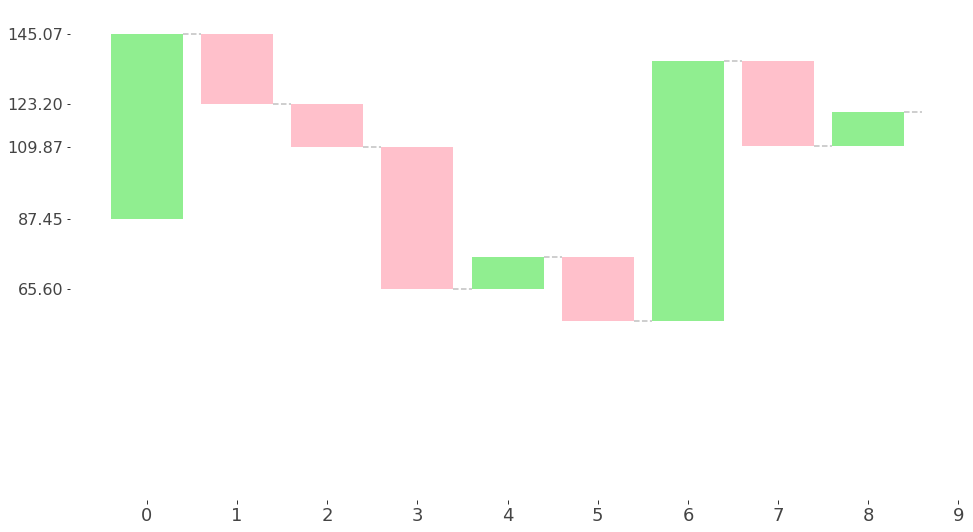

In [76]:

width = 0.8

for x1, y1, y2 in zip(x, y, y[1:]):
    if y1 < y2:
        plt.bar(x1, y2, width=width, color='lightgreen')
        plt.bar(x1, y1, width=width, color='white')
    else: # y2 < y1
        plt.bar(x1, y1, width=width, color='pink')
        plt.bar(x1, y2, width=width, color='white')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.yticks(y[:5],
           size=16,
           color='#444444')

plt.xticks(list(range(10+1)),
           size=18,
           color='#444444')

        
for x1, y1, x2, y2 in zip(x, y, x[1:], y[1:]):
    plt.plot([x1+width/2, x2-width/2], [y2, y2], '--', color='grey', alpha=0.5)

#plt.plot(x, y)
plt.show()

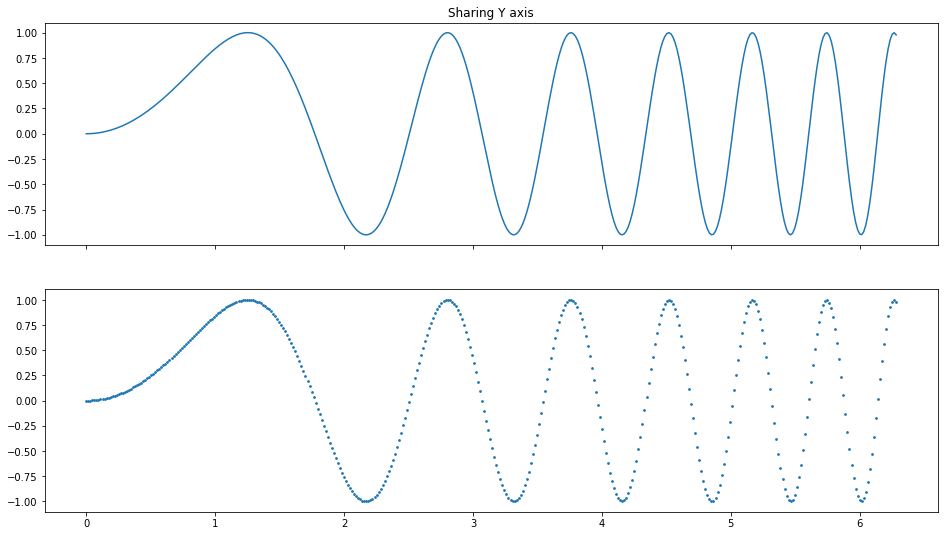

In [80]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [16,9]

x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

#fig, ax = plt.subplots()
#ax.plot(x, y)
#ax.set_title('Simple plot')

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y, s=3)
plt.show()

'''
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axes[0, 0].plot(x, y)
axes[1, 1].scatter(x, y)

plt.subplots(2, 2, sharex='col')

plt.subplots(2, 2, sharey='row')

plt.subplots(2, 2, sharex='all', sharey='all')

plt.subplots(2, 2, sharex=True, sharey=True)
''';